TOPSIS for Pre-trained Models - Text Summarization Model Comparison

submitted by:

Yatin Arora
[102303935]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Defining Data

We compare 5 pre-trained models on 4 criteria:

ROUGE Score, Inference Time, Model Size and Quality

In [3]:
data = {
    'Model': ['BART-Large', 'T5-Small', 'T5-Base', 'Pegasus', 'DistilBART'],
    'ROUGE Score': [44.16, 38.73, 42.05, 47.21, 40.87],
    'Inference Time (s)': [3.45, 1.82, 2.91, 4.15, 2.34],
    'Model Size (MB)': [1625, 242, 892, 2280, 1200],
    'Quality': [88.5, 79.3, 84.7, 91.2, 82.1]
}
df = pd.DataFrame(data)


Defining weights and impacts

In [4]:
matrix = df.iloc[:, 1:].values
weights = np.array([0.3, 0.2, 0.2, 0.3])
impacts = np.array([1, -1, -1, 1])

Calculating normalized and weighted matrices

In [5]:
norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))
weighted_matrix = norm_matrix * weights

Calculating ideal best and ideal worst

In [6]:
best = []
worst = []
for i in range(len(impacts)):
    if impacts[i] == 1:
        best.append(max(weighted_matrix[:, i]))
        worst.append(min(weighted_matrix[:, i]))
    else:
        best.append(min(weighted_matrix[:, i]))
        worst.append(max(weighted_matrix[:, i]))

Calculating the distances and the TOPSIS score

In [7]:
dist_best = np.sqrt(((weighted_matrix - best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - worst)**2).sum(axis=1))
df['Topsis Score'] = dist_worst / (dist_best + dist_worst)
df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)
df = df.sort_values('Rank')

Vizualization

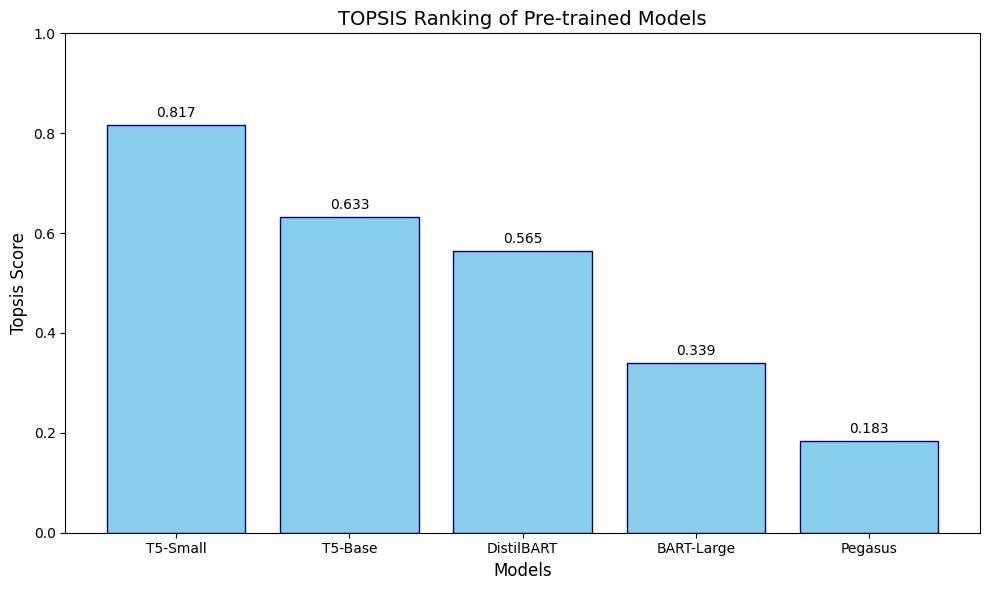

In [8]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['Topsis Score'], color='skyblue', edgecolor='navy')
plt.title('TOPSIS Ranking of Pre-trained Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Topsis Score', fontsize=12)
plt.ylim(0, 1.0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()